# HISTOGRAM PROCESSING


In [ ]:
!pip install numpy matplotlib pillow

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def plot_histogram(hist , bins, title, is_normalized=False):
  width = 0.7* (bins[1]-bins[0])
  center = (bins[:-1] + bins[1:])/2
  if is_normalized :
    plt.bar(center , hist, align='center',width=width)
  else:
    plt.bar(center , hist, align='center',width=width)
  plt.title(title)
  plt.show()

In [ ]:
def calculate_histograms(image):
  img_arr = np.asarray(image)
  hist, bins = np.histogram(img_arr.flatten(), 256, [0, 256])
  num_pixel = np.prod(img_arr.shape) # calculating the no. of pixels.
  normalized_histogram= hist/num_pixel
  return hist , bins, normalized_histogram


In [ ]:
original_image = Image.open("/content/drive/MyDrive/Digital-Image-Processing/img2.jpg")

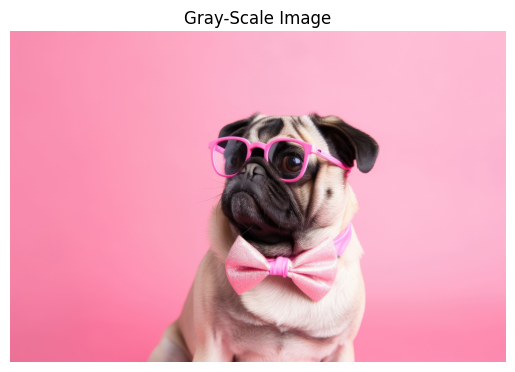

In [ ]:
plt.imshow(original_image)
plt.axis('off')
plt.title('Gray-Scale Image')
plt.show()

In [ ]:
unnormalized_hist, bins, normalized_hist = calculate_histograms(original_image)

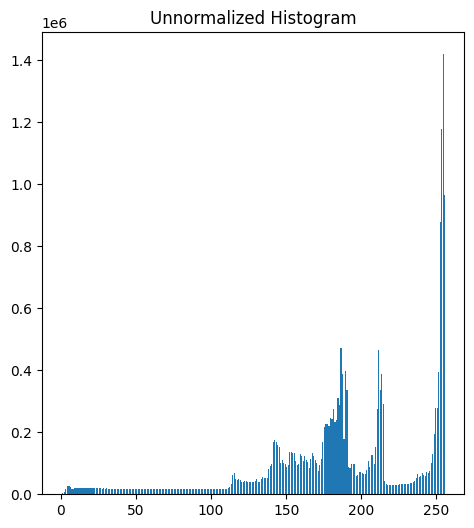

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_histogram(unnormalized_hist, bins, 'Unnormalized Histogram')

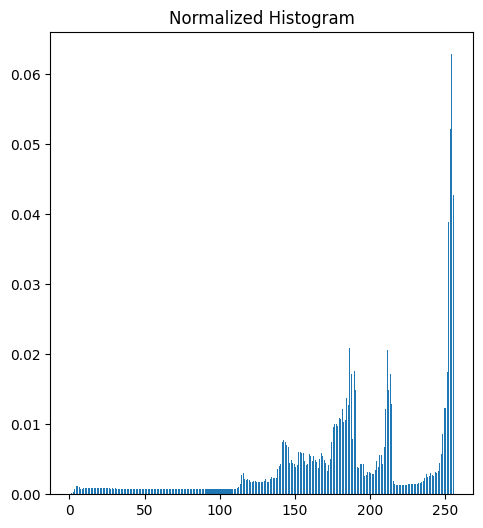

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(122)
plot_histogram(normalized_hist, bins, 'Normalized Histogram', is_normalized=True)

# HISTOGRAM EQUALIZATION

In [ ]:
def histogram_equalization(image):
  img_arr = np.array(image)
  hist, bins = np.histogram(img_arr.flatten(), 256, [0, 256])
  cdf = hist.cumsum()
  cdf_normalized=(cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
  img_equalized = np.interp(img_arr.flatten(), bins[:-1], cdf_normalized).reshape(img_arr.shape)
  equalized_hist, _ = np.histogram(img_equalized.flatten(), 256, [0, 256])
  return Image.fromarray(img_equalized.astype('uint8')), hist, cdf_normalized, equalized_hist


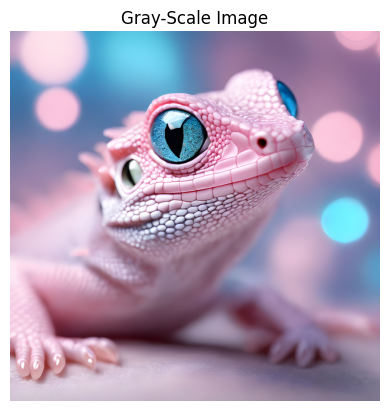

In [ ]:
original_image = Image.open("/content/drive/MyDrive/Digital-Image-Processing/img1.png")
plt.imshow(original_image)
plt.axis('off')
plt.title('Gray-Scale Image')
plt.show()

In [ ]:
equalized_image, original_hist, cdf_normalized, equalized_hist = histogram_equalization(original_image)

In [ ]:
plt.figure(figsize=(18, 6))

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

Text(0, 0.5, 'Count')

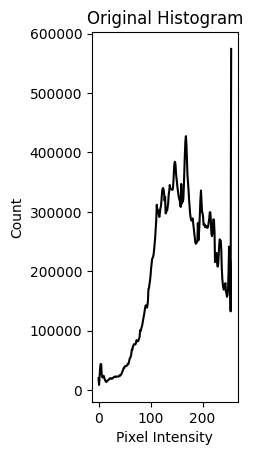

In [ ]:
plt.subplot(131)
plt.plot(original_hist, color='black')
plt.title('Original Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Count')

Text(0, 0.5, 'Cumulative Distribution')

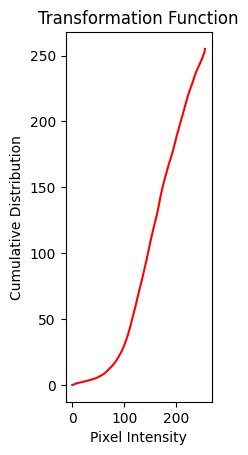

In [ ]:
plt.subplot(132)
plt.plot(cdf_normalized, color='red')
plt.title('Transformation Function')
plt.xlabel('Pixel Intensity')
plt.ylabel('Cumulative Distribution')

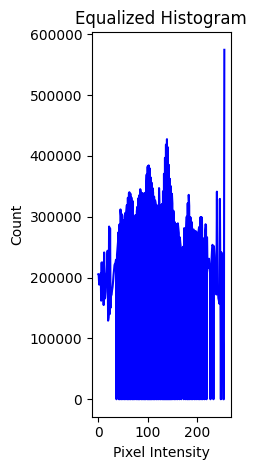

In [ ]:
plt.subplot(133)
plt.plot(equalized_hist, color='blue')
plt.title('Equalized Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

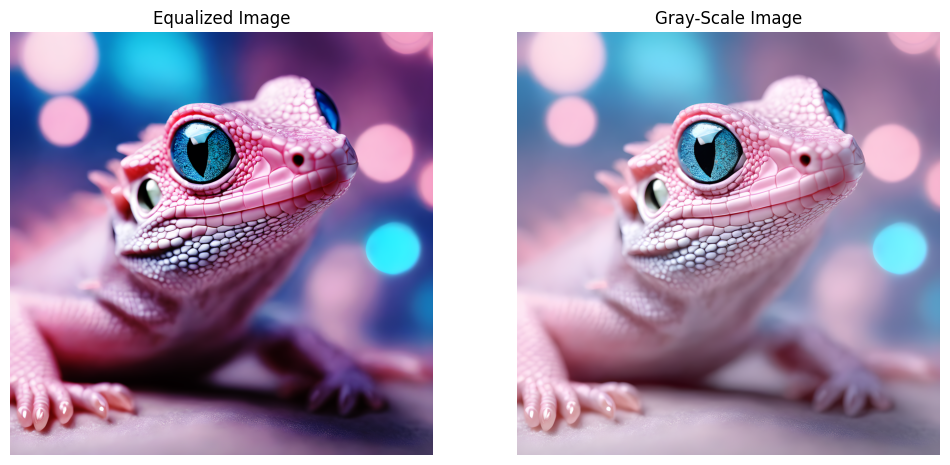

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(equalized_image)
axs[0].axis('off')
axs[0].set_title('Equalized Image')

axs[1].imshow(original_image)
axs[1].axis('off')
axs[1].set_title('Gray-Scale Image')
plt.show()

# HISTOGRAM MATCHING (Specification)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

In [ ]:
def calc_histogram(img):
  hist,_ = np.histogram(img.flatten(),256,[0,256])
  return hist

In [ ]:
def calc_cdf(hist):
  cdf=hist.cumsum()
  cdf_normalized = cdf/cdf.max()
  return cdf_normalized

In [ ]:
def histogram_matching(original,specified):
  original_hist=calc_histogram(original)
  original_cdf=calc_cdf(original_hist)

  specified_hist = calc_histogram(specified)
  specified_cdf = calc_cdf(specified_hist)

  mapping=np.zeros(256,dtype=np.uint8)
  j=0
  for i in range(256):
    while specified_cdf[j]<original_cdf[i] and j<255 :
      j+=1
    mapping[i]=j

  result = mapping[original.flatten()].reshape(original.shape)
  result_hist = calc_histogram(result)
  return result, result_hist, mapping



In [ ]:
original_image=Image.open('/content/drive/MyDrive/Digital-Image-Processing/ai-generated-8274116.png').convert("LA")
original_array = np.array(original_image)

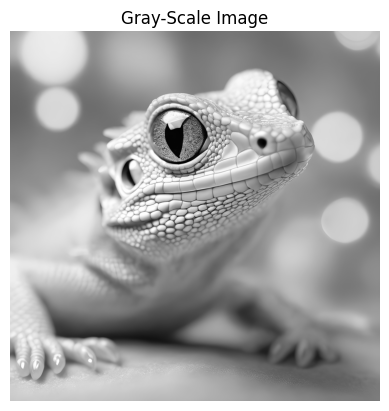

[[[156 255]
  [161 255]
  [158 255]
  ...
  [188 255]
  [195 255]
  [187 255]]

 [[161 255]
  [158 255]
  [160 255]
  ...
  [188 255]
  [188 255]
  [197 255]]

 [[162 255]
  [160 255]
  [159 255]
  ...
  [187 255]
  [187 255]
  [192 255]]

 ...

 [[198 255]
  [199 255]
  [199 255]
  ...
  [126 255]
  [126 255]
  [124 255]]

 [[198 255]
  [198 255]
  [199 255]
  ...
  [125 255]
  [126 255]
  [124 255]]

 [[201 255]
  [201 255]
  [199 255]
  ...
  [123 255]
  [125 255]
  [127 255]]]


In [ ]:
plt.imshow(original_image)
plt.axis('off')
plt.title('Gray-Scale Image')
plt.show()

print(original_array)

In [ ]:
specified_hist = np.concatenate([np.arange(128), np.arange(128)[::-1]]).astype(np.float32)
specified_hist = (specified_hist / specified_hist.max() * np.sum(calc_histogram(original_array))).astype(int)

In [ ]:
matched_image, matched_hist, mapping = histogram_matching(original_array, specified_hist)

In [ ]:
plt.figure(figsize=(12, 8))


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<BarContainer object of 256 artists>

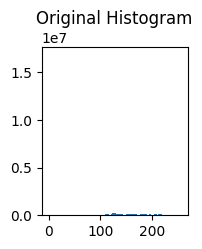

In [ ]:
plt.subplot(231)
plt.title("Original Histogram")
plt.bar(range(256), calc_histogram(original_array))

<BarContainer object of 256 artists>

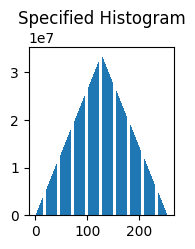

In [ ]:
plt.subplot(232)
plt.title("Specified Histogram")
plt.bar(range(256), specified_hist)

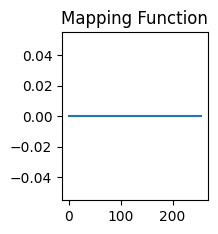

In [ ]:
plt.subplot(233)
plt.title("Mapping Function")
plt.plot(mapping)

<BarContainer object of 256 artists>

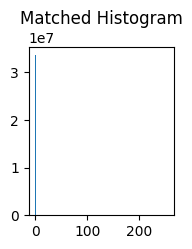

In [ ]:
plt.subplot(235)
plt.title("Matched Histogram")
plt.bar(range(256), matched_hist)

TypeError: Invalid shape (4096, 4096, 2) for image data

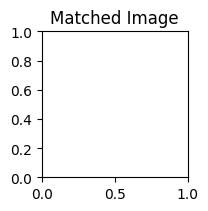

In [ ]:
plt.subplot(234)
plt.title("Matched Image")
plt.imshow(matched_image, cmap='gray')

# In the next class you have to Perform image enhancement using Python and OpenCV:
1. Adjusting Brightness and Contrast
2. Deblurring
3. Noise Reduction
4. Highlight Adjustment
5. Color Correction
6. Histogram Equalization

Do explore these things.